# Application the equivalent layer technique for estimating the magnetization direction at low latitude: Carajás intrusion.

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda3/envs/py2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'carajas_EQL_magdirection_calculation.ipynb'

## Plot style

In [4]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

#### Loading data

In [7]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [8]:
result_carajas = dict()

### Saving files

In [9]:
saved_files = []

### airborne survey information

In [10]:
print 'Shape : (%.0f,%.0f)'% data['shape'] 
print 'Number of data: %.1f' % data['N']
print 'dx: %.1f m' % data['dx']
print 'dy: %.1f m ' % data['dy']

Shape : (111,19)
Number of data: 2123.0
dx: -298.0 m
dy: 1839.0 m 


## Properties of the model

### Main field

In [11]:
inc_gf,dec_gf = data['main_field']

In [12]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 8.0 degree
Main field declination: -17.3 degree


## Generating the layer with my function 

In [13]:
h = 1000.

#### Generating a layer

In [14]:
xs = data['x']
ys = data['y']
zs = h*np.ones_like(xs)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [15]:
i_pos = 1500

In [16]:
it_max = 30

In [17]:
it_marq = 15

In [18]:
lamb = 10.
dlamb = 100.

In [19]:
eps_e = 1e-4
eps_i = 1e-4

In [20]:
mu_list = [1e3,1e4,1e5,2.5*1e5,5*1e5,7.5*1e5]

In [21]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_10'],data['x'],data['y'],
        data['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(data['x'],data['y'],data['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_10'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
-8.645459869645308 -5.822681327585434
0.02721427339619635
i = 1
-7.460636547472274 -3.0629382220263017
0.01956249888405664
i = 2
-6.4337314265911605 -1.1660603776271774
0.014043031871744568
i = 3
-5.5644112100792595 0.07592821759151558
0.009045477967747217
i = 4
-4.807995238990002 0.8568453504951691
0.005840609910187236
i = 5
-4.13579439187282 1.3132970037358207
0.003906470052933587
i = 6
-3.525870683959711 1.5565143384623856
0.002837021782332465
i = 7
-2.962070766174412 1.657138257352816
0.002235739876674963
i = 8
-2.4357980229609173 1.6615663718697413
0.0018621308636235932
i = 9
-1.940765670355849 1.6021146037819527
0.0016135037013769835
i = 10
-1.472038844497178 1.4993770598904783
0.0014347947740762923
i = 11
-1.0306414707478169 1.366333288997436
0.0012699849622655795
i = 12
-0.6129996385152432 1.2141724654271768
0.0011384000155481922
i = 13
-0.21584148485346089 1.050064234217034
0.001031486460857472
i = 14
0.1642622679901951 0.8801955765164785
0.0009460728422197514
i = 15
0.5

-2.798099510096707 1.4384692626712492
0.001973054274509212
i = 8
-2.2668012341324255 1.4340973840530793
0.001645512881828821
i = 9
-1.7665600596144047 1.3682289577233215
0.0014320753265884
i = 10
-1.2956019125583407 1.2601675619513297
0.0012601244093777787
i = 11
-0.8515686729558032 1.123247763814855
0.0011184283251800284
i = 12
-0.4295948933409804 0.9680370413301806
0.0010111744290013855
i = 13
-0.02703550038173697 0.8020891479958578
0.0009216996093729666
i = 14
0.3590726561736823 0.6289933268042354
0.0008490937649306039
i = 15
0.7303712411136866 0.45438443454263944
0.0007853259096691466
i = 16
1.0883805174914256 0.28174138704905544
0.0007293321858159087
i = 17
1.4338238300787245 0.11269763656323631
0.0006778148750989204
i = 18
1.7671893870635709 -0.05157848671953286
0.0006297711305923014
i = 19
2.0893026085339224 -0.21037645282596956
0.0005863686214510261
i = 20
2.4002890104369454 -0.36343394776598364
0.0005450316527659083
i = 21
2.7006457529808214 -0.51122891600452
0.000507022874436

## L-curve visualization

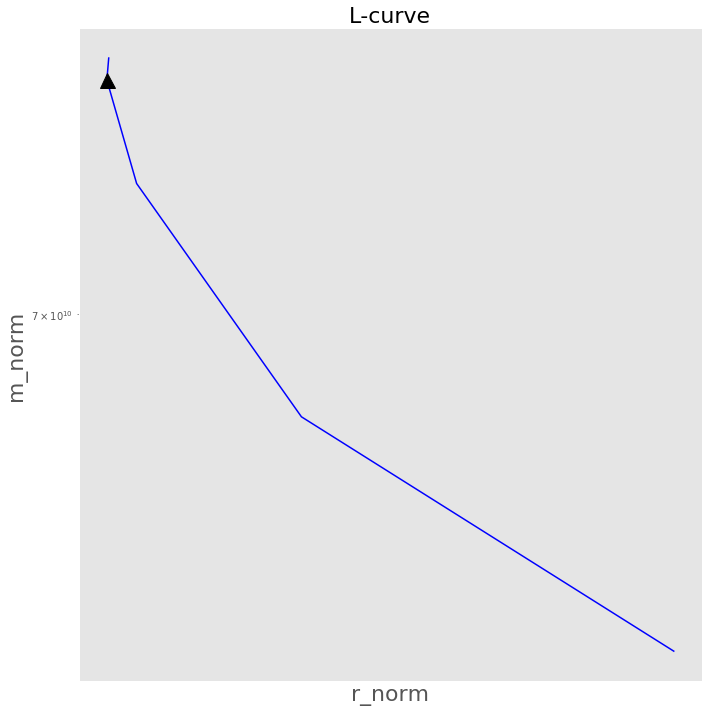

In [27]:
title_font = 22
bottom_font = 20
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(10,10), tight_layout=True)

plt.loglog(norm_r,norm_m, 'b-')
plt.plot(norm_r[2],norm_m[2], 'k^',markersize=15)
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=bottom_font)

file_name = 'figs/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [23]:
result_carajas['magnetic_moment'] = m_est
result_carajas['inc_est'] = incl_est
result_carajas['dec_est'] = decl_est
result_carajas['layer_depth'] = h
result_carajas['reg_parameter'] = mu_list
result_carajas['phi'] = phi_list

### Generating .pickle file

In [24]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_carajas['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [25]:
file_name = 'data/result_carajas.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_carajas, f)
    
saved_files.append(file_name)

### Saved files

In [26]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/Lcurve_RM.png
2  figs/Lcurve_RM.eps
3  data/result_carajas.pickle
